In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras
import tensorflow
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"D:\Assignment\Assignments-16\gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6800 non-null   float64
 1   AP      6800 non-null   float64
 2   AH      6800 non-null   float64
 3   AFDP    6800 non-null   float64
 4   GTEP    6800 non-null   float64
 5   TIT     6800 non-null   float64
 6   TAT     6799 non-null   float64
 7   TEY     6799 non-null   float64
 8   CDP     6799 non-null   float64
 9   CO      6799 non-null   float64
 10  NOX     6799 non-null   float64
dtypes: float64(11)
memory usage: 584.5 KB


In [4]:
data[data.duplicated(keep=False)]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


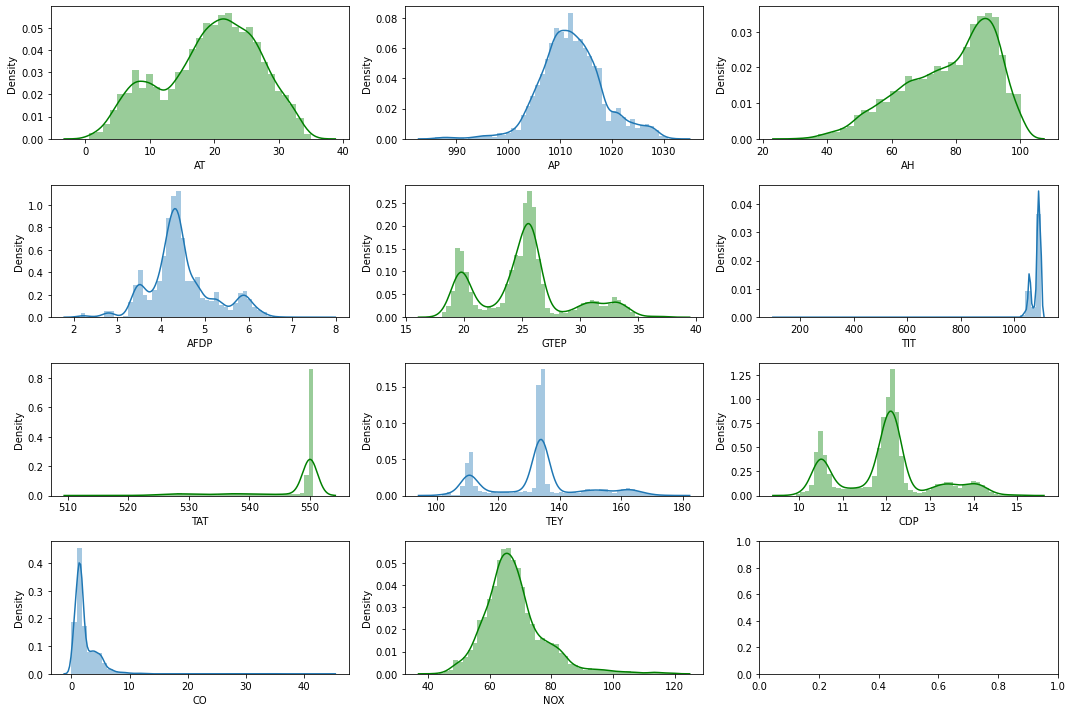

In [5]:
#checking the distribution of dataset by using distance plot
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.distplot(data.AT, ax=ax[0,0],color='g')
sns.distplot(data.AP, ax=ax[0,1])
sns.distplot(data.AH, ax=ax[0,2],color='g')
sns.distplot(data.AFDP, ax=ax[1,0])
sns.distplot(data.GTEP, ax=ax[1,1],color='g')
sns.distplot(data.TIT, ax=ax[1,2])
sns.distplot(data.TAT, ax=ax[2,0],color='g')
sns.distplot(data.TEY, ax=ax[2,1])
sns.distplot(data.CDP, ax=ax[2,2],color='g')
sns.distplot(data.CO, ax=ax[3,0])
sns.distplot(data.NOX, ax=ax[3,1],color='g')

plt.tight_layout()
plt.show()

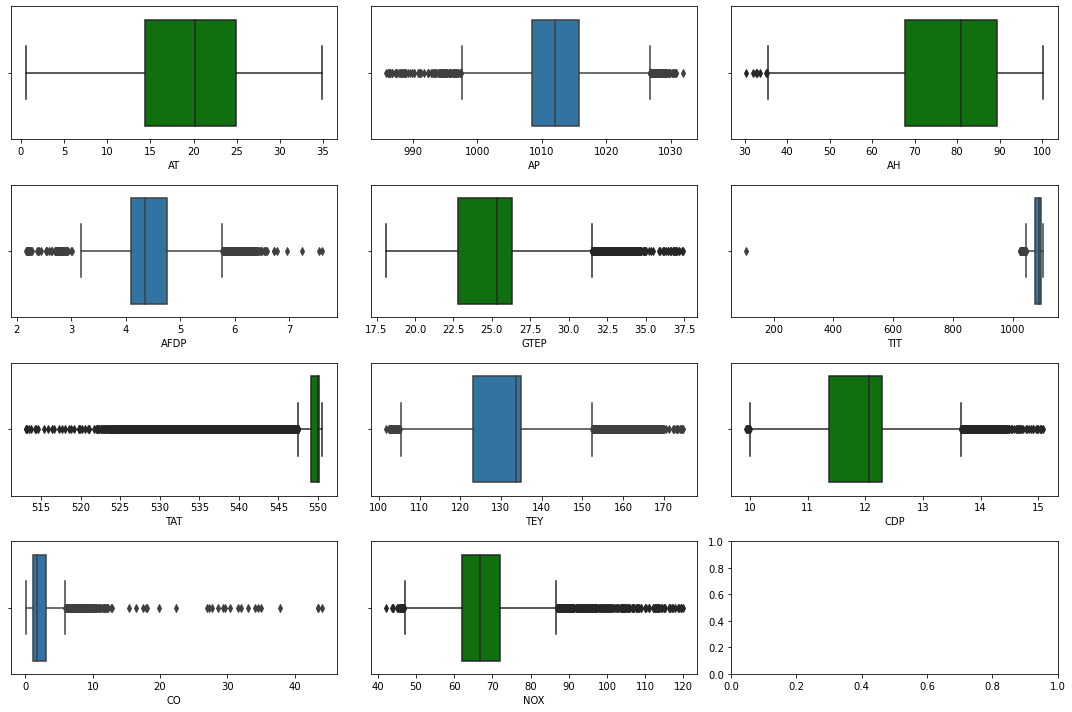

In [6]:
#Check for outliers in the dataset, using boxplot
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(data.AT, ax=ax[0,0],color='g')
sns.boxplot(data.AP, ax=ax[0,1])
sns.boxplot(data.AH, ax=ax[0,2],color='g')
sns.boxplot(data.AFDP, ax=ax[1,0])
sns.boxplot(data.GTEP, ax=ax[1,1],color='g')
sns.boxplot(data.TIT, ax=ax[1,2])
sns.boxplot(data.TAT, ax=ax[2,0],color='g')
sns.boxplot(data.TEY, ax=ax[2,1])
sns.boxplot(data.CDP, ax=ax[2,2],color='g')
sns.boxplot(data.CO, ax=ax[3,0])
sns.boxplot(data.NOX, ax=ax[3,1],color='g')

plt.tight_layout()
plt.show()

In [7]:
#Normalising the data using a mixmax scaler library
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.479869,0.951587,0.245886,0.080976,0.958098,0.985855,0.178189,0.131279,0.071372,0.522916
1,0.182020,0.490751,0.956154,0.245849,0.084344,0.958199,0.985855,0.178464,0.129920,0.073223,0.523611
2,0.185295,0.499456,0.939272,0.242657,0.086986,0.958300,0.982386,0.178326,0.130502,0.072427,0.519647
3,0.189922,0.508161,0.929392,0.242309,0.087659,0.958501,0.985588,0.178464,0.131473,0.072225,0.522247
4,0.199830,0.519042,0.927974,0.245446,0.086260,0.958602,0.985322,0.178464,0.132637,0.073497,0.517626
...,...,...,...,...,...,...,...,...,...,...,...
6795,0.351434,0.760609,0.729438,0.115027,0.312973,0.986402,0.983987,0.458573,0.396398,0.033724,0.306833
6796,0.338530,0.769314,0.731500,0.108973,0.298985,0.984388,0.985055,0.436626,0.377183,0.032956,0.298441
6797,0.329433,0.775843,0.745303,0.108569,0.292042,0.983985,0.980251,0.433471,0.383006,0.024213,0.279316
6798,0.321353,0.778020,0.751403,0.107028,0.292819,0.983683,0.981052,0.431824,0.379318,0.032357,0.287051


In [8]:
#Extracting the independent and dependent variables, from the dataset
X = data1.drop(axis=0,columns="TEY").values
Y = data1["TEY"].values

In [9]:
X

array([[0.18418215, 0.47986942, 0.95158657, ..., 0.13127863, 0.07137226,
        0.52291594],
       [0.18201978, 0.49075082, 0.95615442, ..., 0.12992004, 0.07322279,
        0.52361095],
       [0.18529531, 0.49945593, 0.93927201, ..., 0.13050229, 0.07242679,
        0.51964683],
       ...,
       [0.32943293, 0.77584331, 0.74530328, ..., 0.38300598, 0.02421324,
        0.2793158 ],
       [0.32135311, 0.77801959, 0.75140329, ..., 0.37931838, 0.03235693,
        0.28705098],
       [0.30667573, 0.77801959, 0.76363194, ...,        nan,        nan,
               nan]])

In [10]:
Y

array([0.1781893 , 0.17846365, 0.17832647, ..., 0.43347051, 0.43182442,
              nan])

In [11]:
#Fixing a random seed for ensuring that the algorithm produces the same accuracy by selecting a similar sample, everytime, it runs the code
seed = 7
np.random.seed(seed)

In [12]:
#Constructing a Sequential neural network with 12 neurons in the first input layer, 8 neurons in the hidden layer and 1 neuron in the output layer
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [13]:
#Compiling the model and using Mean squared error as the loss function and adam as the weight optimizer
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Fitting the model
model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
456/456 [==============================] - 4s 6ms/step - loss: 0.0218 - accuracy: 2.1954e-04 - val_loss: nan - val_accuracy: 4.4543e-04
Epoch 2/100
456/456 [==============================] - 2s 4ms/step - loss: 0.0015 - accuracy: 2.1954e-04 - val_loss: nan - val_accuracy: 4.4543e-04
Epoch 3/100
438/456 [===========================>..] - ETA: 0s - loss: 7.9456e-04 - accuracy: 2.2831e-04

In [ ]:
#Evaluation of the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

In [ ]:
#List all the evaulation metric in built model (history)
model.history.history.keys()

In [ ]:
#Visualising the model history for train and test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Visualising the model history for the train and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Tuning the Hyperparameters :- Batch Size and Epochs

In [ ]:
#Creating a user defined function, that has the neural network model and compiles the model with the loss function and weight optimizers
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
#Using Gridsearch CV, to find the best parameters, that contributes to higher accuracy of Regression,by passing in the user defined model function
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

# Conclusion:
The neural network helps predicting the turbine energy yield (TEY) using ambient variables as features, with the validation loss of 1.4047e-04, while evaluating the model.

Since, this is a regression problem, our evaluation metric is MSE, thus, our aim is to reduce the MSE value between the original and the predicted.